In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
from tensorflow import keras
import seaborn as sns

In [2]:
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D, ReLU

In [3]:
def cnn_model(img_rows, img_cols, img_channels):
    model = Sequential()
    model.add(Conv2D(64, (3, 3),activation='linear',kernel_initializer='he_uniform',
                     input_shape=(img_rows, img_cols, img_channels)))
    model.add(ReLU())   # add an advanced activation
    model.add(MaxPooling2D(pool_size=(5, 5)))
    model.add(Conv2D(32, (3, 3),activation='linear',kernel_initializer='he_uniform'))
    model.add(ReLU())   # add an advanced activation
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Conv2D(16, (3, 3),activation='linear',kernel_initializer='he_uniform'))
    model.add(ReLU())   # add an advanced activation
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Dense(1024))
    model.add(ReLU())   # add an advanced activation
    model.add(Dense(4))
    model.add(Activation('softmax'))

    return model

In [4]:
from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report, accuracy_score

In [5]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications.vgg16 import VGG16

In [6]:
from tensorflow.python.keras.layers import Input, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from tensorflow.keras import regularizers, Sequential

In [7]:
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, input_shape=(3,)),
    tf.keras.layers.Softmax()])
model.save('/tmp/model')
loaded_model = tf.keras.models.load_model('/tmp/model')
x = tf.random.uniform((10, 3))
assert np.allclose(model.predict(x), loaded_model.predict(x))

INFO:tensorflow:Assets written to: /tmp/model\assets


In [9]:
from tensorflow.keras import models
from tensorflow.keras import models
from tensorflow.keras.models import Model, load_model

In [10]:
LABELS = ["Normal", "Fraud"]

In [11]:
df = pd.read_csv("creditcard.csv")
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [12]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [15]:
df.shape

(284807, 31)

In [16]:
df.isnull().values.any()

False

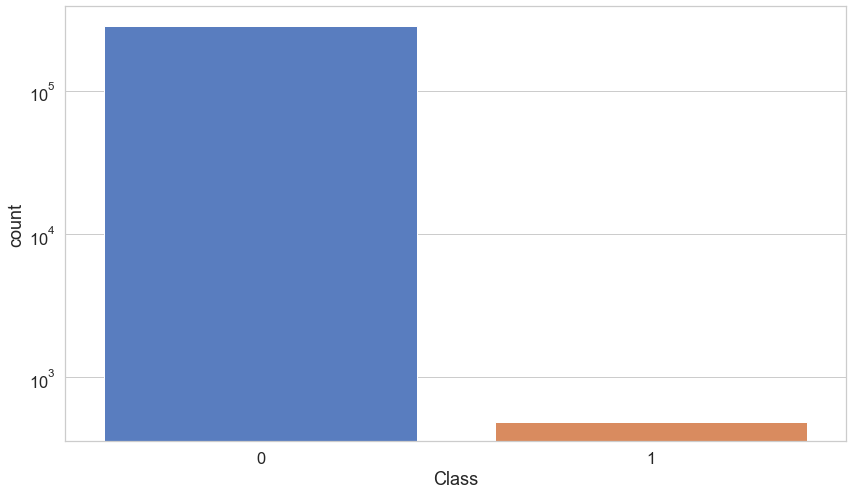

In [17]:
ax=sns.countplot(x='Class',data=df);
ax.set_yscale('log')

In [18]:
frauds = df[df.Class == 1]
normal = df[df.Class == 0]
frauds.shape

(492, 31)

In [19]:
normal.shape

(284315, 31)

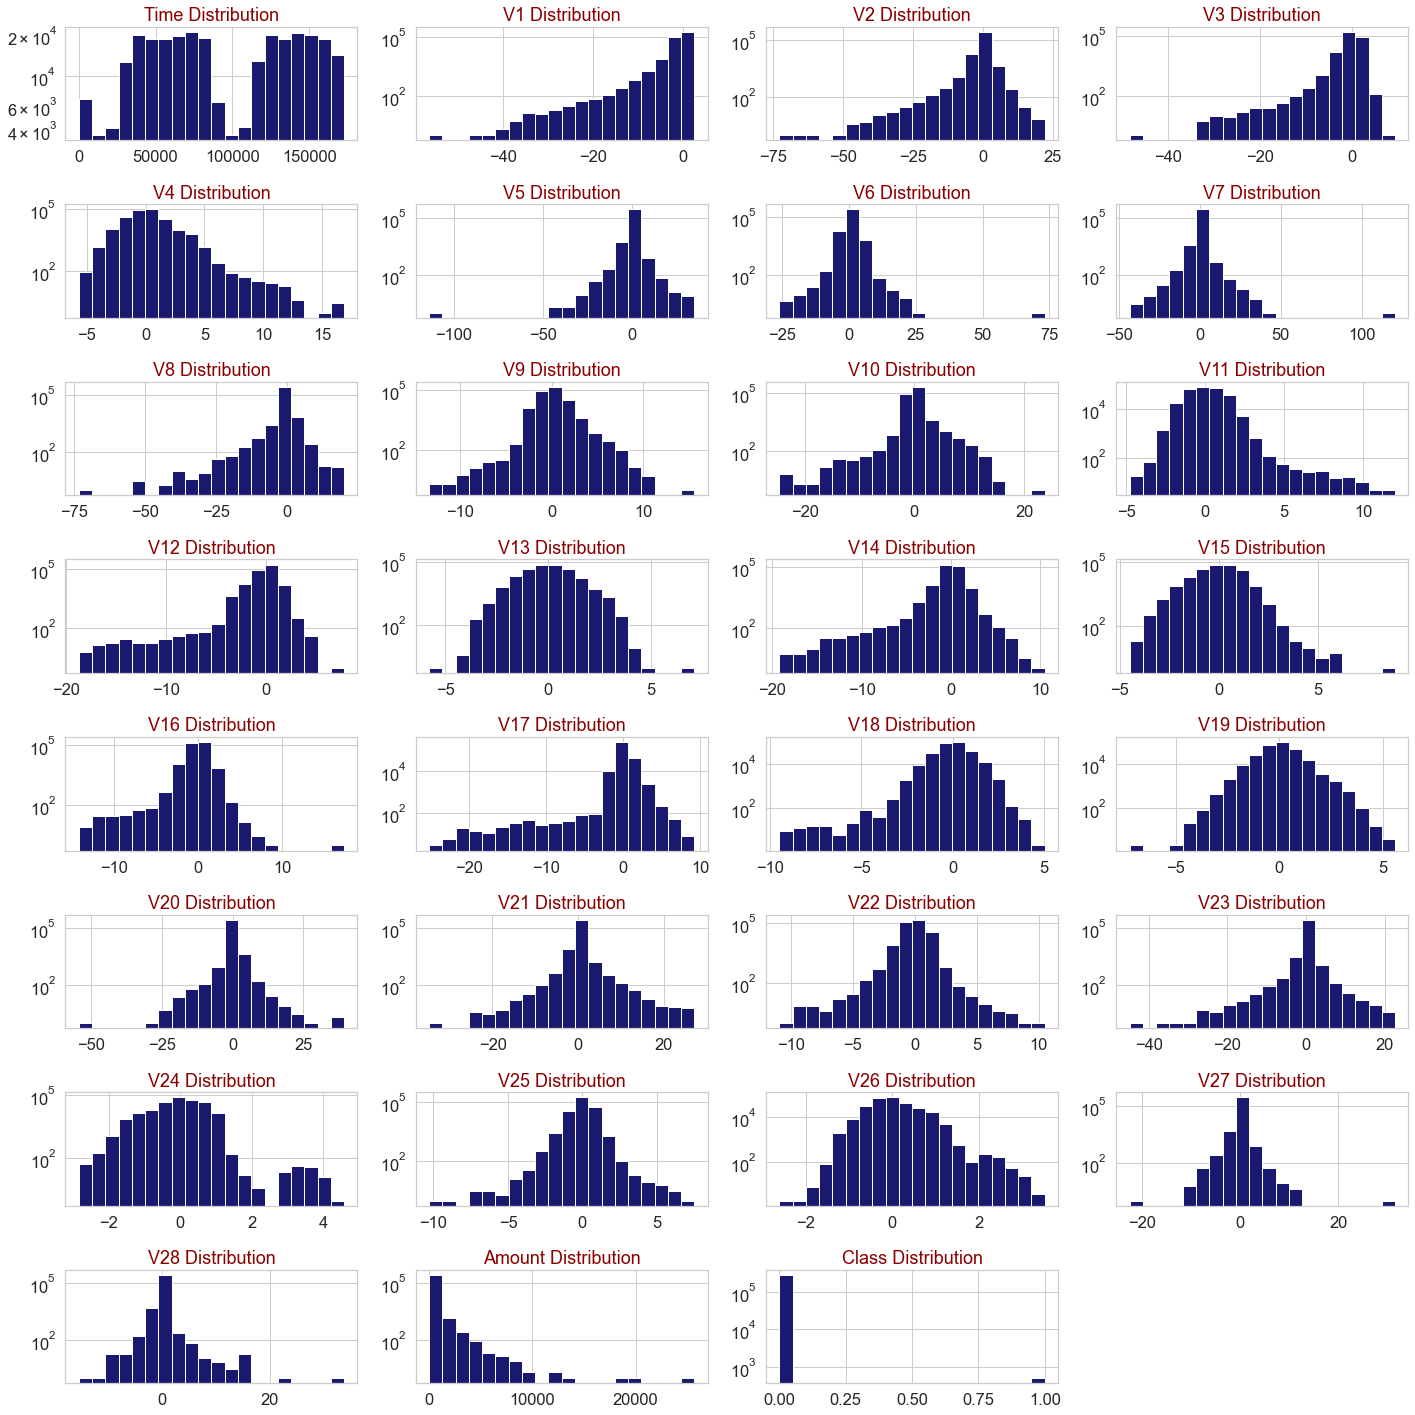

In [20]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()
draw_histograms(df,df.columns,8,4)

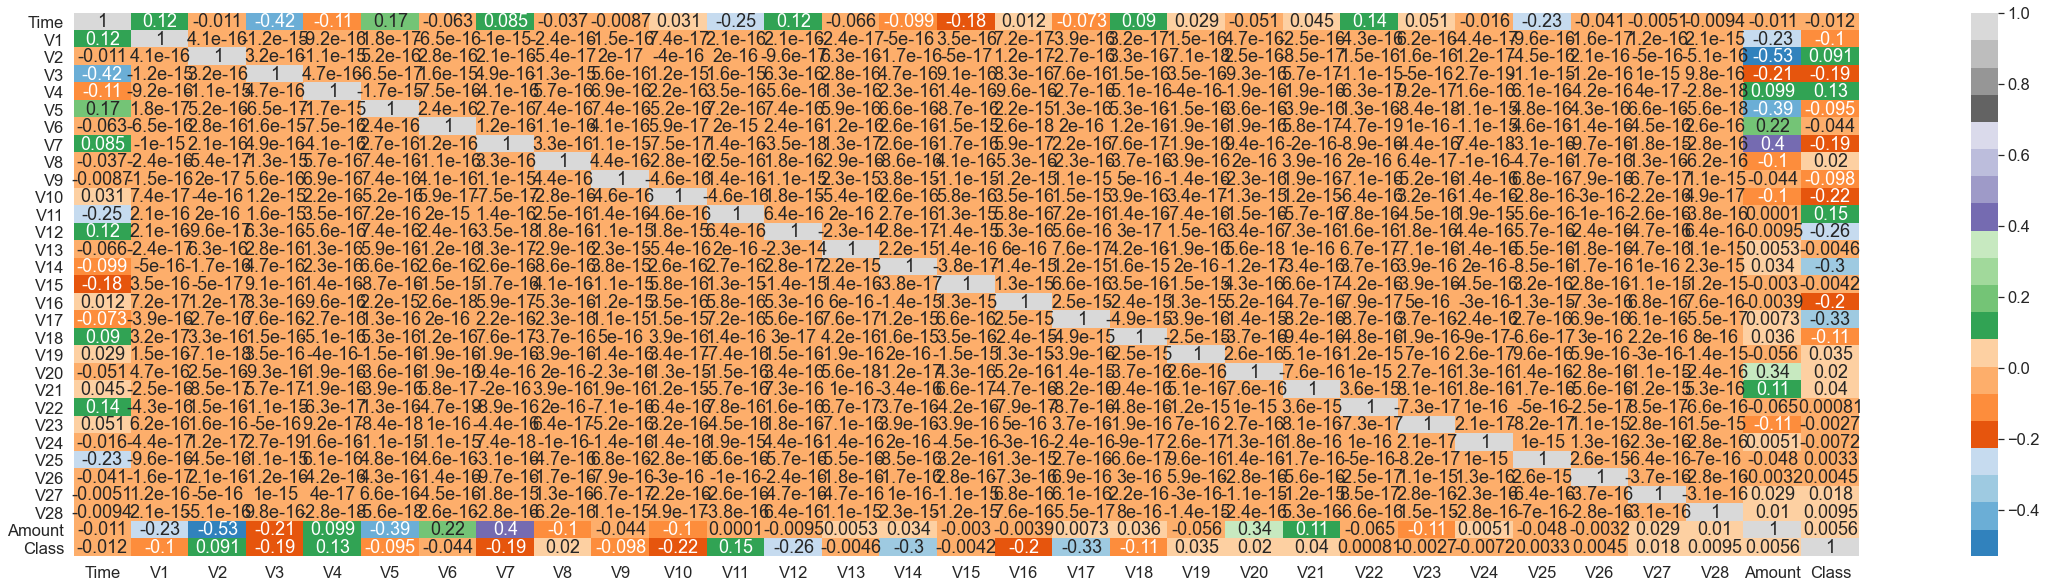

In [21]:
plt.figure(figsize = (40,10))
sns.heatmap(df.corr(), annot = True, cmap="tab20c")
plt.show()

In [22]:
frauds.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [23]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

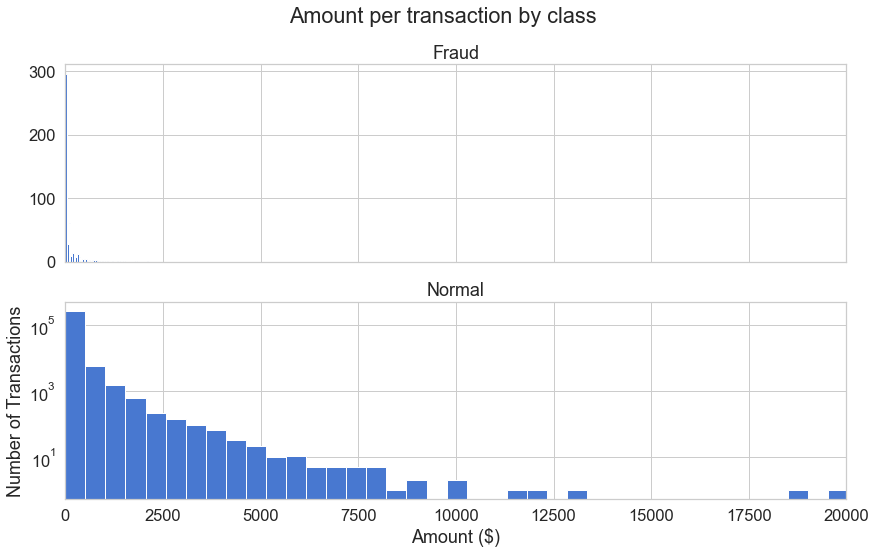

In [24]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')

bins = 50

ax1.hist(frauds.Amount, bins = bins)
ax1.set_title('Fraud')

ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show()

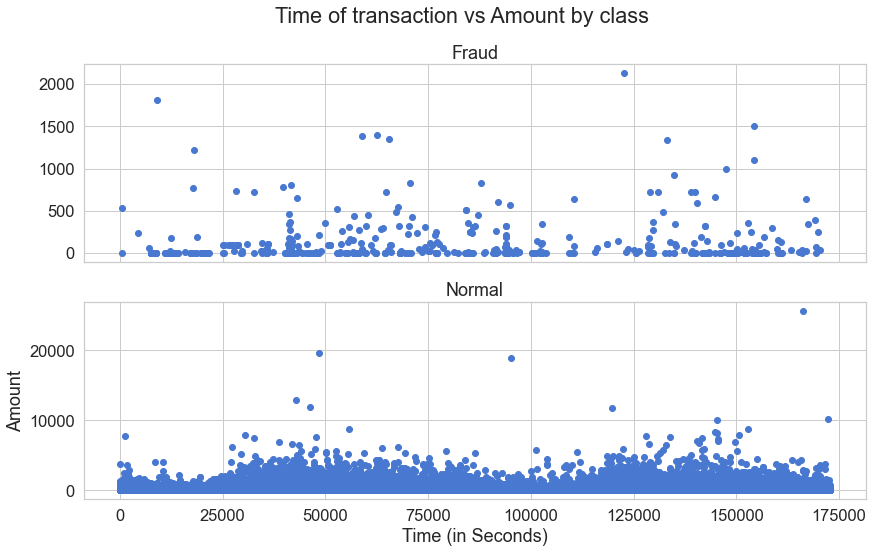

In [25]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(frauds.Time, frauds.Amount)
ax1.set_title('Fraud')

ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [26]:
normal_sample = normal.sample(n=492)

In [27]:
new_data = pd.concat([normal_sample,frauds],axis=0)

In [28]:
new_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
167072,118470.0,0.115515,0.841046,-0.140694,-0.829158,0.920173,-0.529656,0.995332,-0.145190,0.015631,...,-0.327632,-0.756844,-0.058400,-1.008601,-0.347776,0.202488,0.246091,0.087102,3.57,0
26231,33961.0,1.568121,-1.218220,0.438254,-1.496551,-1.606349,-0.381210,-1.410895,0.023831,-1.241809,...,-0.141809,-0.069236,-0.075409,-0.516889,0.388341,-0.043926,0.039284,0.013458,6.00,0
152204,97081.0,2.072729,-0.272088,-1.417956,0.239180,0.352191,-0.103346,-0.176832,-0.177568,2.551706,...,-0.114896,0.159712,-0.004347,0.010159,0.250375,0.168855,-0.062140,-0.068107,19.60,0
208837,137295.0,2.208285,-0.845871,-0.792760,-1.135225,-0.583822,-0.292880,-0.862499,-0.151126,-0.195987,...,-0.006731,-0.037519,0.235318,-1.060927,-0.370535,-0.407888,0.015575,-0.044986,24.00,0
130008,79262.0,1.225657,-0.544665,0.754738,-0.899789,-1.160570,-0.357372,-0.810521,0.242038,1.869805,...,-0.003900,0.111869,-0.066025,-0.024422,0.450042,-0.677372,0.077069,0.017739,1.00,0


In [29]:
new_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [30]:
frauds = new_data[new_data.Class == 1]
normal = new_data[new_data.Class == 0]
frauds.shape

(492, 31)

In [31]:
normal.shape

(492, 31)

In [32]:
from sklearn.preprocessing import StandardScaler

df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))

In [33]:
non_fraud = df[df['Class'] == 0] #.sample(1000)
fraud = df[df['Class'] == 1]

df = non_fraud.append(fraud).sample(frac=1).reset_index(drop=True)
X = df.drop(['Class'], axis = 1).values
Y = df["Class"].values

In [34]:
X_train, X_test = train_test_split(df, test_size=0.2, random_state=RANDOM_SEED)
X_train_fraud = X_train[X_train.Class == 1]
X_train = X_train[X_train.Class == 0]
X_train = X_train.drop(['Class'], axis=1)
y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)
X_train = X_train.values
X_test = X_test.values
X_train.shape

(227446, 30)

In [35]:
input_layer = Input(shape=(X.shape[1],))

## encoding part
encoded = Dense(100, activation='tanh', activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoded = Dense(50, activation='relu')(encoded)

## decoding part
decoded = Dense(50, activation='tanh')(encoded)
decoded = Dense(100, activation='tanh')(decoded)

## output layer
output_layer = Dense(X.shape[1], activation='relu')(decoded)

In [36]:
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer="adadelta", loss="mse")

In [37]:
x = df.drop(["Class"], axis=1)
y = df["Class"].values

x_scale = MinMaxScaler().fit_transform(x.values)
x_norm, x_fraud = x_scale[y == 0], x_scale[y == 1]

autoencoder.fit(x_norm[0:2000], x_norm[0:2000], 
                batch_size = 256, epochs = 10, 
                shuffle = True, validation_split = 0.20);

Epoch 1/10
7/7 [==============================] - 1s 56ms/step - loss: 0.2626 - val_loss: 0.2622
Epoch 2/10
7/7 [==============================] - 0s 9ms/step - loss: 0.2624 - val_loss: 0.2620
Epoch 3/10
7/7 [==============================] - 0s 8ms/step - loss: 0.2622 - val_loss: 0.2617
Epoch 4/10
7/7 [==============================] - 0s 9ms/step - loss: 0.2619 - val_loss: 0.2615
Epoch 5/10
7/7 [==============================] - 0s 8ms/step - loss: 0.2617 - val_loss: 0.2612
Epoch 6/10
7/7 [==============================] - 0s 8ms/step - loss: 0.2614 - val_loss: 0.2610
Epoch 7/10
7/7 [==============================] - 0s 7ms/step - loss: 0.2612 - val_loss: 0.2607
Epoch 8/10
7/7 [==============================] - 0s 8ms/step - loss: 0.2609 - val_loss: 0.2605
Epoch 9/10
7/7 [==============================] - 0s 8ms/step - loss: 0.2606 - val_loss: 0.2602
Epoch 10/10
7/7 [==============================] - 0s 8ms/step - loss: 0.2604 - val_loss: 0.2600


In [38]:
hidden_representation = Sequential()
hidden_representation.add(autoencoder.layers[0])
hidden_representation.add(autoencoder.layers[1])
hidden_representation.add(autoencoder.layers[2])

In [39]:
norm_hid_rep = hidden_representation.predict(x_norm[:3000])
fraud_hid_rep = hidden_representation.predict(x_fraud)

In [40]:
rep_x = np.append(norm_hid_rep, fraud_hid_rep, axis = 0)
y_n = np.zeros(norm_hid_rep.shape[0])
y_f = np.ones(fraud_hid_rep.shape[0])
rep_y = np.append(y_n, y_f)

In [41]:
train_x, val_x, train_y, val_y = train_test_split(rep_x, rep_y, test_size=0.25)

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [43]:
print(X.shape)

(284807, 30)


In [44]:
print(X_train.shape)

(227845, 30)


In [45]:
print(X_test.shape)

(56962, 30)


In [46]:
clf = LogisticRegression(solver="lbfgs").fit(train_x, train_y)
pred_y = clf.predict(val_x)

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_y))

print ("")
print ("Accuracy Score: ", accuracy_score(val_y, pred_y))


Classification Report: 
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       747
         1.0       0.98      0.69      0.81       126

    accuracy                           0.95       873
   macro avg       0.96      0.84      0.89       873
weighted avg       0.95      0.95      0.95       873


Accuracy Score:  0.9530355097365406
